# 汉语 书平 考试 1 - 6 级 词汇表 数据分析

---


# HSK (Chinese Proficiency Exam) 1 - 6 Vocabulary List

By this project we would like to help students know the importance of each initial and character driven by the frequency of apparitions on the HSK vocabulary, which does not inform directly, but subtly.
Our database will be each .xlsx and .csv files downloaded from the website https://www.purpleculture.net/textbook-vocab-lists/
We will need to concatenate all the files. In order to do that, we need to see if columns are the same between the six files. If not, we will have to transform the data until every file is compatible with each other.
After concatenation, we will need to **split every word/phrase into single characters. Thus, allowing us to count the frequency of each character.**
A histogram will be the cherry-on-top for the project, allowing the visualization of the data ordered from top most frequent to least frequent character.


# Importation of libraries, Google Drive mounting and databases importation

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
import pandas as pd
import glob

path = r'/content/drive/MyDrive/HSK Vocabulary List'

# Iter all .csv files
file_list = glob.glob(path + "/*.csv")

# Create empty list
csv_list = []

# Iter all files in the path
for file in file_list:
    csv_list.append(pd.read_csv(file))

# Create empty DataFrame
df = pd.DataFrame()

# Append each file
for csv_file in csv_list:
    df = pd.concat([df, pd.DataFrame.from_records(csv_file)], ignore_index=True)
df

,Unnamed: 0,ID,Chinese,Trad.,Pinyin,English Definition,Unnamed: 6
0,NaN,1,爱情,愛情,ài qíng,(romantic) love,NaN
1,NaN,2,安排,安排,ān pái,arrange; to plan,NaN
2,NaN,3,安全,安全,ān quán,safe; safety; secure; security,NaN
3,NaN,4,按时,按時,àn shí,on time; on schedule,NaN
4,NaN,5,按照,按照,àn zhào,according to; in accordance with; in light of,NaN
...,...,...,...,...,...,...,...
4996,NaN,147,知道,知道,zhī dao,know; be aware of,NaN
4997,NaN,148,准备,准備,zhǔn bèi,prepare; get ready,NaN
4998,NaN,149,走,走,zǒu,to walk; to go; to move (Kangxi radical 156),NaN
4999,NaN,150,最,最,zuì,the most; -est; (indicator for superlative),NaN


# Preprocessing

In [108]:
# Rename columns with more suitable labels
columns_mapping = {
    'Chinese': 'Simplified',
    'Trad.': 'Traditional',
    'English Definition': 'English Translation'
}
df = df.rename(columns=columns_mapping)

#Delete empty columns
df = df.dropna(axis=1, how='all')
df

,ID,Simplified,Traditional,Pinyin,English Translation
0,1,爱情,愛情,ài qíng,(romantic) love
1,2,安排,安排,ān pái,arrange; to plan
2,3,安全,安全,ān quán,safe; safety; secure; security
3,4,按时,按時,àn shí,on time; on schedule
4,5,按照,按照,àn zhào,according to; in accordance with; in light of
...,...,...,...,...,...
4996,147,知道,知道,zhī dao,know; be aware of
4997,148,准备,准備,zhǔn bèi,prepare; get ready
4998,149,走,走,zǒu,to walk; to go; to move (Kangxi radical 156)
4999,150,最,最,zuì,the most; -est; (indicator for superlative)


# New dataframe for frequency calculation

In [112]:
# We need to split the Simplified column into rows by hanzi, so we can count each character's frequency
# Let's do it in a new df which will be a copy of the original one
df_hsk_freq = df.copy()

import re
#String split into a list per row with the split characters
df_hsk_freq['Simplified'] = df_hsk_freq['Simplified'].apply(
    lambda x : re.findall('.{1,1}', x))

#Explode the dataset, it means to split every element of the lists into a different row
df_hsk_freq = df_hsk_freq.explode('Simplified')
df_hsk_freq

,ID,Simplified,Traditional,Pinyin,English Translation
0,1,爱,愛情,ài qíng,(romantic) love
0,1,情,愛情,ài qíng,(romantic) love
1,2,安,安排,ān pái,arrange; to plan
1,2,排,安排,ān pái,arrange; to plan
2,3,安,安全,ān quán,safe; safety; secure; security
...,...,...,...,...,...
4997,148,备,准備,zhǔn bèi,prepare; get ready
4998,149,走,走,zǒu,to walk; to go; to move (Kangxi radical 156)
4999,150,最,最,zuì,the most; -est; (indicator for superlative)
5000,151,左,左邊,zuǒ bian,the left side; the left


In [119]:
#Delete the unnecessary columns
df_hsk_freq.iloc[:,:2]
df_hsk_freq = df_hsk_freq
df_hsk_freq

,ID,Simplified,Traditional,Pinyin,English Translation
0,1,爱,愛情,ài qíng,(romantic) love
0,1,情,愛情,ài qíng,(romantic) love
1,2,安,安排,ān pái,arrange; to plan
1,2,排,安排,ān pái,arrange; to plan
2,3,安,安全,ān quán,safe; safety; secure; security
...,...,...,...,...,...
4997,148,备,准備,zhǔn bèi,prepare; get ready
4998,149,走,走,zǒu,to walk; to go; to move (Kangxi radical 156)
4999,150,最,最,zuì,the most; -est; (indicator for superlative)
5000,151,左,左邊,zuǒ bian,the left side; the left


# Hanzi frequency

In [123]:
# Font installation or it won't print Chinese characters in charts
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# Import plotting libraries and font manager
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

--2023-09-06 01:20:44--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.157.100, 142.250.157.138, 142.250.157.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.157.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n7n8tgjiq6jav05k4ff48lgt8i9takeh/1693963200000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=f84710f7-4dd0-466d-ba58-5bfdb75c989c [following]
--2023-09-06 01:20:45--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n7n8tgjiq6jav05k4ff48lgt8i9takeh/1693963200000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=f84710f7-4dd0-466d-ba58-5bfdb75c989c
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to do

In [198]:
# Top X character by frequency
top_x = 25
top = df_hsk_freq["Simplified"].value_counts().index[:top_x]
# Print top X so we can check against the histogram
top

Index(['不', '子', '心', '气', '发', '理', '人', '动', '实', '生', '力', '一', '成', '分',
       '意', '得', '大', '事', '行', '然', '时', '体', '公', '无', '地'],
      dtype='object')

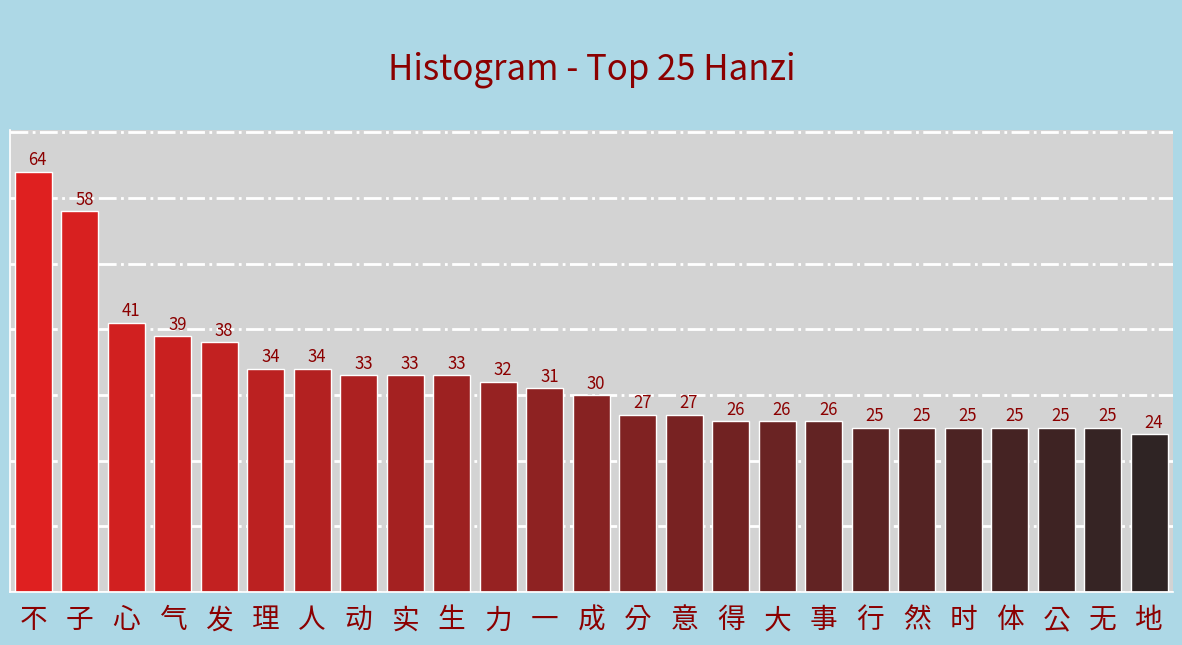

<Figure size 640x480 with 0 Axes>

In [218]:
# Apply font
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rcParams['font.family'] = 'Taipei Sans TC Beta'

# Histogram filtered by top 15
plt.figure(figsize=(15, 6))
histogram = sns.countplot(
    x = df_hsk_freq.Simplified,
    order = top,
    palette=sns.color_palette("dark:red_r", len(top))
)

# Customize backgrounds
histogram.set_facecolor('lightgrey')
histogram.grid(which='major', axis="y", linewidth=2, linestyle="-.")

# Customize title
histogram.set_title(
    f'\nHistogram - Top {top_x} Hanzi\n',
    fontsize=25,
    fontweight='bold',
    color = "darkred"
)

# Drop the Y label and ticks
histogram.set(yticklabels="")
histogram.set(ylabel=None)

# Drop the X label
histogram.set(xlabel=None)

# Set Y limit to be a bit higher than top frequency
max_freq = max(df_hsk_freq.Simplified.value_counts())
histogram.set_ylim(0, max_freq * 1.1)

# Customize the X ticks
histogram.set_xticklabels(
    top,
    size = 20,
    color = "darkred"
)

# Annotate data labels a bit above each column
for p, label in zip(histogram.patches, df_hsk_freq.Simplified.value_counts()):
    histogram.annotate(
        label,
        (p.get_x()+0.3, p.get_height()+1),
        fontsize=12,
        color="darkred"
    )

sns.despine()
plt.show()

plt.savefig(f"Top {top_x} Hanzi by frequency all HSK vocabulary list.jpg")

The top 2 characters mean "no" and "son" (though not used to address a son, it is an etymological meaning, it is often used in nouns, for example, table 桌子 and chair 椅子), they are both written with three strokes and are the only characters that appear more than fifty times.
The remaining characters, are also simple characters like heart, air, life, strength, person and one.

In [ ]:
#These datasets can lead us to some conclusions
unique = df_hsk_freq.Simplified.nunique()
rows = len(hsk1_6)
average = len(df_hsk_freq)/rows
average_hsk6 = len(df_hsk_freq[hsk1_6['HSK']==6])/len(hsk6)

#Unique quantities per exam
unique_hsk1 = df_hsk_freq[hsk1_6['HSK']==1]["Simplified"].nunique()
unique_hsk2 = df_hsk_freq[hsk1_6['HSK']==2]["Simplified"].nunique()
unique_hsk3 = df_hsk_freq[hsk1_6['HSK']==3]["Simplified"].nunique()
unique_hsk4 = df_hsk_freq[hsk1_6['HSK']==4]["Simplified"].nunique()
unique_hsk5 = df_hsk_freq[hsk1_6['HSK']==5]["Simplified"].nunique()
unique_hsk6 = df_hsk_freq[hsk1_6['HSK']==6]["Simplified"].nunique()


print(f"""Conclusions:

1- Actually, we study {unique:,} distinct hanzi, in a total of {rows:,} words.
2- The average of characters per row is: {average:.2f}
3- The average of characters per row does not change much from the whole HSK 1-6 vocabulary list to only HSK 6 list since it is {average_hsk6:.2f}
4- The most frequent characters are beginner friendly.
5- The distinct hanzi qunatity per HSK exam is:

HSK 1 = {unique_hsk1}
HSK 2 = {unique_hsk2}
HSK 3 = {unique_hsk3}
HSK 4 = {unique_hsk4}
HSK 5 = {unique_hsk5}
HSK 6 = {unique_hsk6}
""")

Conclusions:

1- Actually, we study 2,077 distinct hanzi, in a total of 5,001 words.
2- The average of characters per row is: 1.02
3- The average of characters per row does not change much from the whole HSK 1-6 vocabulary list to only HSK 6 list since it is 0.00
4- The most frequent characters are beginner friendly.
5- The distinct hanzi qunatity per HSK exam is:

HSK 1 = 0
HSK 2 = 0
HSK 3 = 0
HSK 4 = 757
HSK 5 = 1334
HSK 6 = 0



<ipython-input-57-496686a23139>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  average_hsk6 = len(df_hsk_freq[hsk1_6['HSK']==6])/len(hsk6)
<ipython-input-57-496686a23139>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_hsk1 = df_hsk_freq[hsk1_6['HSK']==1]["Simplified"].nunique()
<ipython-input-57-496686a23139>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_hsk2 = df_hsk_freq[hsk1_6['HSK']==2]["Simplified"].nunique()
<ipython-input-57-496686a23139>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_hsk3 = df_hsk_freq[hsk1_6['HSK']==3]["Simplified"].nunique()
<ipython-input-57-496686a23139>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_hsk4 = df_hsk_freq[hsk1_6['HSK']==4]["Simplified"].nunique()
<ipython-input-57-496686a23139>:12: UserWarning: Boolean Series key will be reindexed to match DataFr